In [204]:
import pandas as pd
import matplotlib as plt
import numpy as np

0 secs - video data starts
34 secs - sensor data starts
46 secs - attention intervals start

In [104]:
sensor_data = pd.read_csv("data/sensor.csv", delimiter=";")
attention_interval = pd.read_csv("data/attention_intervals.csv")
attention = pd.read_csv("data/attention.csv")

In [105]:
#add timing indicator
sensor_data.insert(0, "index", range(0,len(sensor_data)))
sensor_data["seconds"] = sensor_data["index"] * 15 + 34

In [106]:
attention_interval += 46

In [107]:
attention["overall"] = attention["luuk"] + attention["jan"] + attention["carlos"] + attention["mayank"]

In [108]:
attention["seconds"] = attention["seconds"].astype("int")

In [109]:
new = pd.merge(attention, sensor_data, on="seconds", how="left")

In [110]:
luuk = attention_interval.iloc[:,:1]
jan = attention_interval.iloc[:,1:2]
mayank = attention_interval.iloc[:,2:3]
carlos = attention_interval.iloc[:,3:4]

In [111]:
luuk.dropna(inplace=True)
jan.dropna(inplace=True)
carlos.dropna(inplace=True)

In [112]:
luuk["luuk_indicator"] = 1
jan["jan_indicator"] = 1
mayank["mayank_indicator"] = 1
carlos["carlos_indicator"] = 1

/var/folders/fl/z36dzxyn0ql9_2v5cpk99q_c0000gn/T/ipykernel_71962/2238878028.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mayank["mayank_indicator"] = 1


In [113]:
luuk.rename(columns={"Luuk": "seconds"}, inplace=True)
jan.rename(columns={"Jan": "seconds"}, inplace=True)
mayank.rename(columns={"Mayank": "seconds"}, inplace=True)
carlos.rename(columns={"Carlos": "seconds"}, inplace=True)

/var/folders/fl/z36dzxyn0ql9_2v5cpk99q_c0000gn/T/ipykernel_71962/3929840990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mayank.rename(columns={"Mayank": "seconds"}, inplace=True)


In [114]:
luuk["seconds"] = luuk["seconds"].astype("int")
jan["seconds"] = jan["seconds"].astype("int")
mayank["seconds"] = mayank["seconds"].astype("int")
carlos["seconds"] = carlos["seconds"].astype("int")

/var/folders/fl/z36dzxyn0ql9_2v5cpk99q_c0000gn/T/ipykernel_71962/1193655532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mayank["seconds"] = mayank["seconds"].astype("int")


In [115]:
new = pd.merge(new, luuk, on="seconds", how="left")
new = pd.merge(new, jan, on="seconds", how="left")
new = pd.merge(new, mayank, on="seconds", how="left")
new = pd.merge(new, carlos, on="seconds", how="left")

In [120]:
new["luuk_indicator"] = new["luuk_indicator"].fillna(0)
new["jan_indicator"] = new["jan_indicator"].fillna(0)
new["mayank_indicator"] = new["mayank_indicator"].fillna(0)
new["carlos_indicator"] = new["carlos_indicator"].fillna(0)

<AxesSubplot: xlabel='seconds'>

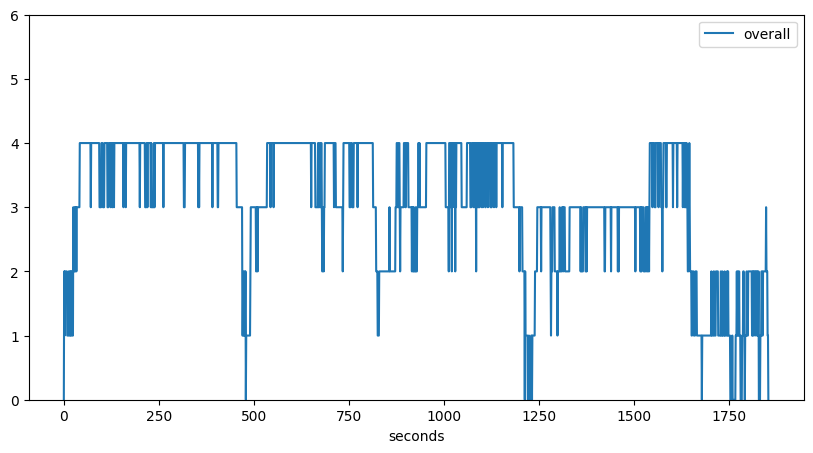

In [138]:
new.plot(x="seconds",y="overall", ylim=(0,6), figsize=(10,5))

<AxesSubplot: xlabel='seconds'>

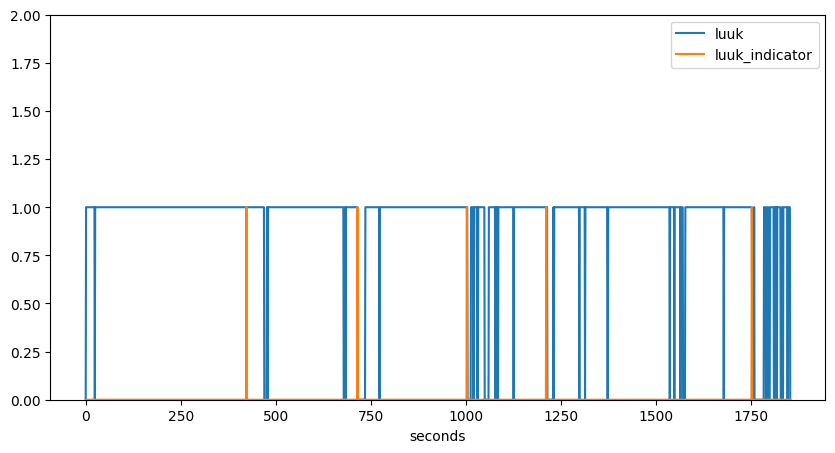

In [141]:
new.plot(x="seconds",y=["luuk", "luuk_indicator"], ylim=(0,2), figsize=(10,5))

<AxesSubplot: xlabel='seconds'>

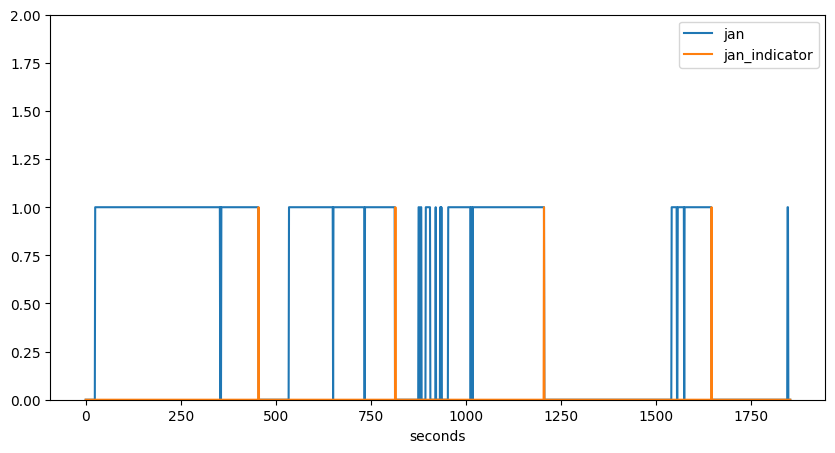

In [144]:
new.plot(x="seconds",y=["jan", "jan_indicator"],kind="line", ylim=(0,2), figsize=(10,5))

<AxesSubplot: xlabel='seconds'>

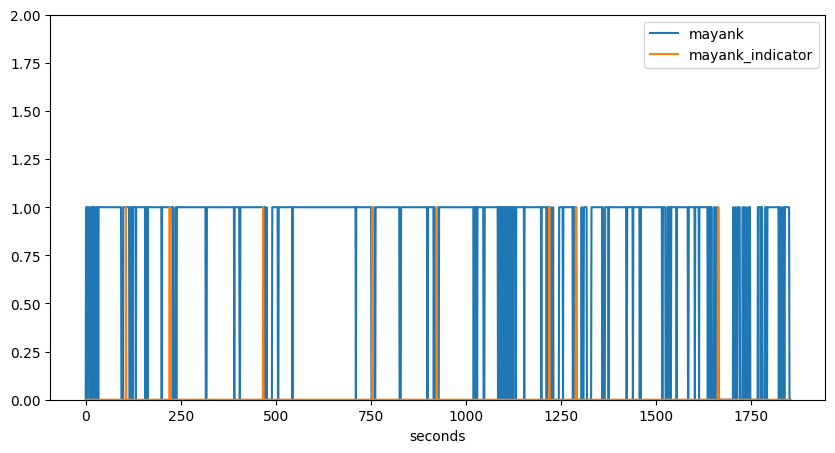

In [145]:
new.plot(x="seconds",y=["mayank", "mayank_indicator"],kind="line", ylim=(0,2), figsize=(10,5))

<AxesSubplot: xlabel='seconds'>

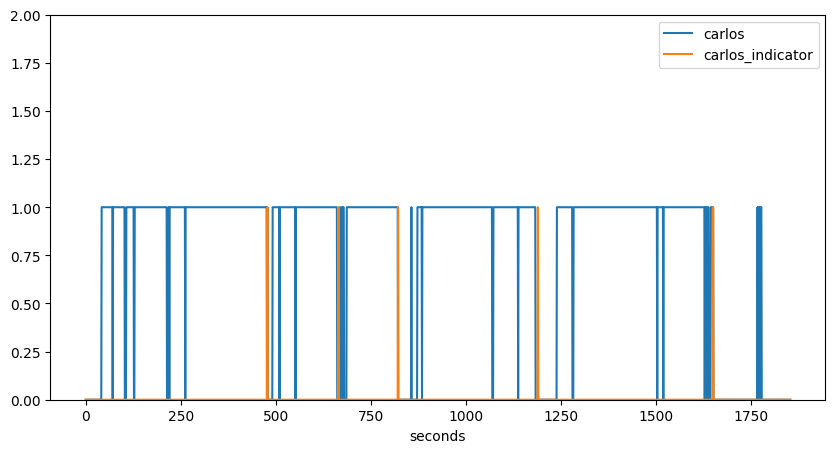

In [146]:
new.plot(x="seconds",y=["carlos", "carlos_indicator"],kind="line", ylim=(0,2), figsize=(10,5))

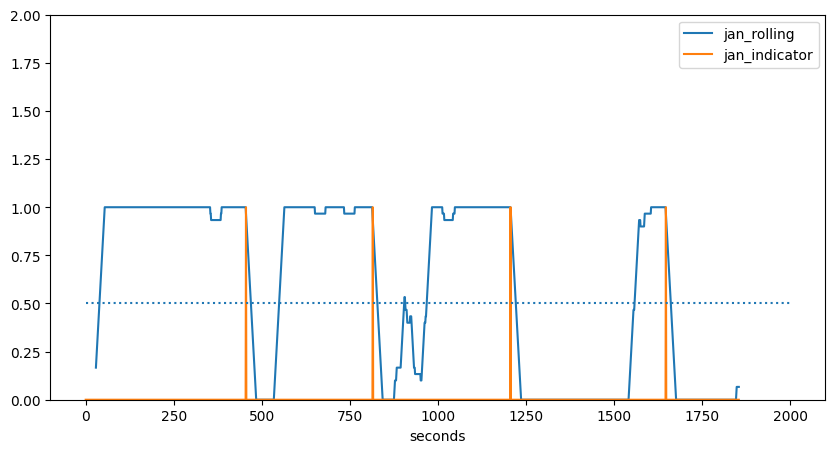

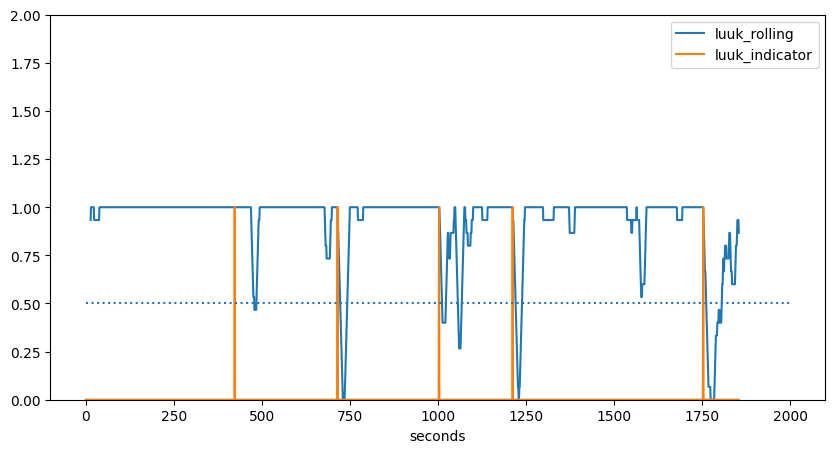

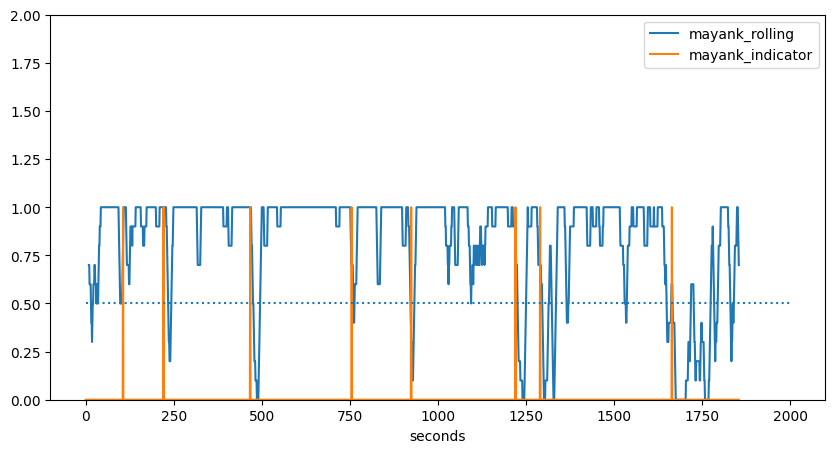

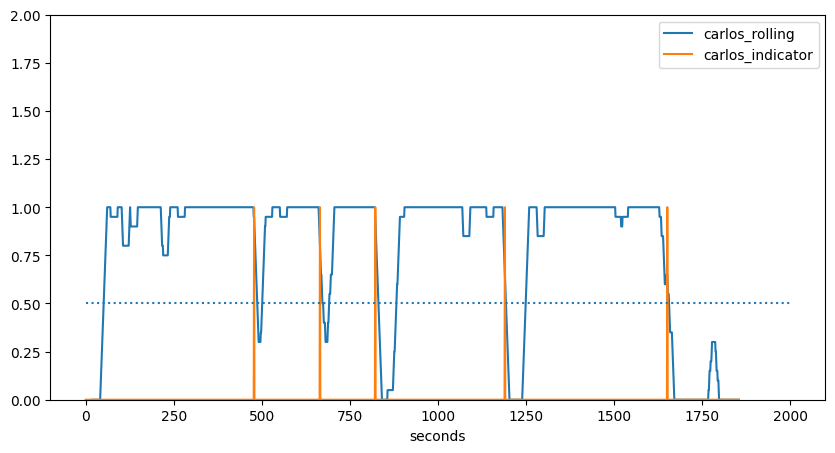

In [295]:
rolling = 10 
new["jan_rolling"] = new["jan"].rolling(30).mean()
new["luuk_rolling"] = new["luuk"].rolling(15).mean()
new["mayank_rolling"] = new["mayank"].rolling(10).mean()
new["carlos_rolling"] = new["carlos"].rolling(20).mean()
new.plot(x="seconds",y=["jan_rolling", "jan_indicator"],kind="line", ylim=(0,2), figsize=(10,5)).hlines(0.5, 0, 2000, linestyles="dotted")
new.plot(x="seconds",y=["luuk_rolling", "luuk_indicator"],kind="line", ylim=(0,2), figsize=(10,5)).hlines(0.5, 0, 2000, linestyles="dotted")
new.plot(x="seconds",y=["mayank_rolling", "mayank_indicator"],kind="line", ylim=(0,2), figsize=(10,5)).hlines(0.5, 0, 2000, linestyles="dotted")
new.plot(x="seconds",y=["carlos_rolling", "carlos_indicator"],kind="line", ylim=(0,2), figsize=(10,5)).hlines(0.5, 0, 2000, linestyles="dotted")

In [296]:
new["luuk_attention_break"] = new["luuk_rolling"] <= 0.5
new["jan_attention_break"] = new["jan_rolling"] <= 0.5
new["mayank_attention_break"] = new["mayank_rolling"] <= 0.5
new["carlos_attention_break"] = new["carlos_rolling"] <= 0.5

In [267]:
new["carlos_attention_break"] = new["carlos_attention_break"].astype(int)

In [268]:
new["carlos_attention_break_rolling"] = new["carlos_attention_break"].rolling(120, min_periods=1).max()
new["jan_attention_break_rolling"] = new["jan_attention_break"].rolling(120, min_periods=1).max()
new["mayank_attention_break_rolling"] = new["mayank_attention_break"].rolling(120, min_periods=1).max()
new["luuk_attention_break_rolling"] = new["luuk_attention_break"].rolling(120, min_periods=1).max()

In [269]:
new["attention_break_rolling_sum"] = new["carlos_attention_break_rolling"] + new["jan_attention_break_rolling"] + new["mayank_attention_break_rolling"] +new["luuk_attention_break_rolling"]

In [297]:
new["minute"] = new["seconds"] / 60
new["minute"] = new["minute"].apply(np.floor)

<AxesSubplot: xlabel='seconds'>

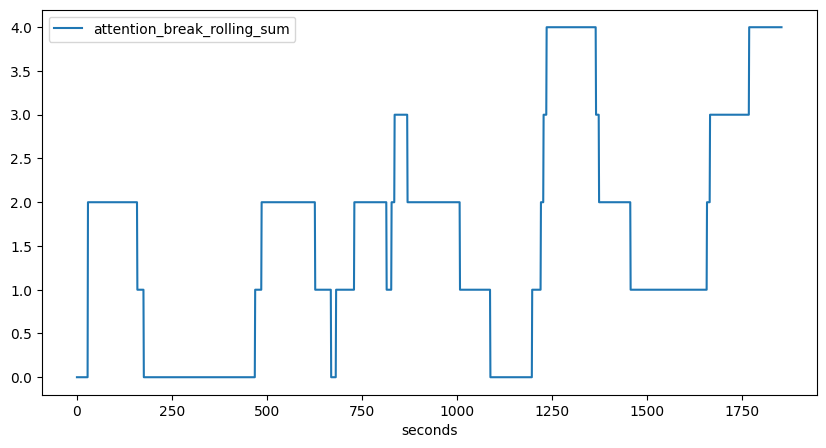

In [298]:
new.plot(x="seconds",y=["attention_break_rolling_sum"],kind="line", figsize=(10,5))

In [299]:
aggregate= new[["minute", "jan_attention_break", "luuk_attention_break", "mayank_attention_break", "carlos_attention_break"]]

In [300]:
aggregate["jan_attention_break"] = aggregate["jan_attention_break"].astype(int)
aggregate["luuk_attention_break"] = aggregate["luuk_attention_break"].astype(int)
aggregate["carlos_attention_break"] = aggregate["carlos_attention_break"].astype(int)
aggregate["mayank_attention_break"] = aggregate["mayank_attention_break"].astype(int)

/var/folders/fl/z36dzxyn0ql9_2v5cpk99q_c0000gn/T/ipykernel_71962/1558066608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregate["jan_attention_break"] = aggregate["jan_attention_break"].astype(int)
/var/folders/fl/z36dzxyn0ql9_2v5cpk99q_c0000gn/T/ipykernel_71962/1558066608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregate["luuk_attention_break"] = aggregate["luuk_attention_break"].astype(int)
/var/folders/fl/z36dzxyn0ql9_2v5cpk99q_c0000gn/T/ipykernel_71962/1558066608.py:3: SettingWithC

In [301]:
test = aggregate.groupby("minute").max()

In [302]:
test["sum"] = test["jan_attention_break"] + test["carlos_attention_break"] + test["luuk_attention_break"] + test["mayank_attention_break"]

In [303]:
test

,jan_attention_break,luuk_attention_break,mayank_attention_break,carlos_attention_break,sum
minute,,,,,
0.0,1,0,1,1,3
1.0,0,0,1,0,1
2.0,0,0,0,0,0
3.0,0,0,1,0,1
4.0,0,0,1,0,1
5.0,0,0,0,0,0
6.0,0,0,0,0,0
7.0,1,1,1,0,3
8.0,1,1,1,1,4


<AxesSubplot: xlabel='minute'>

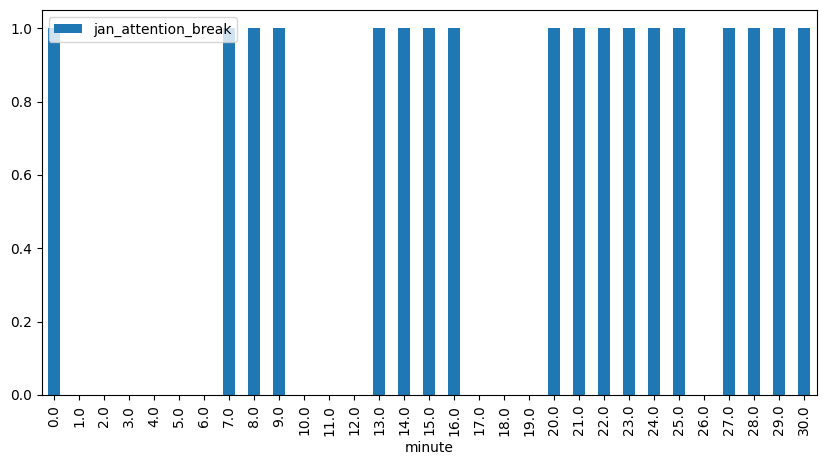

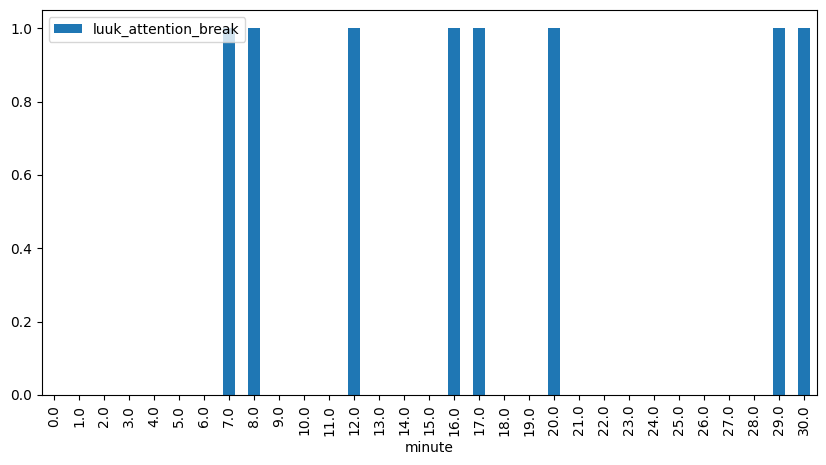

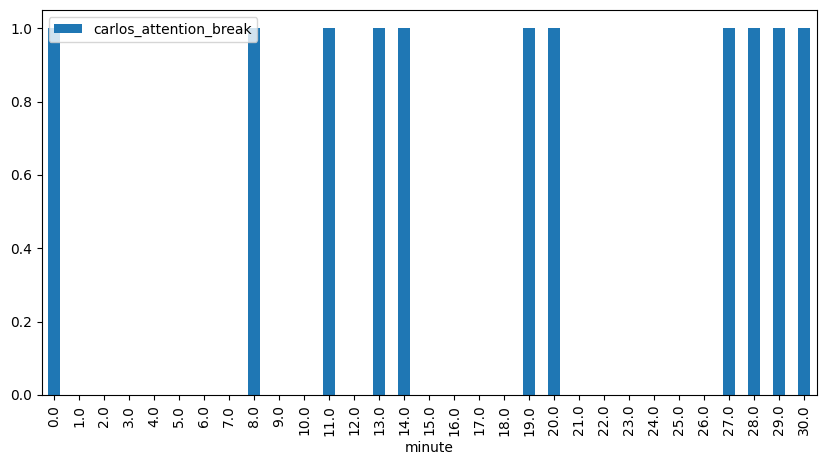

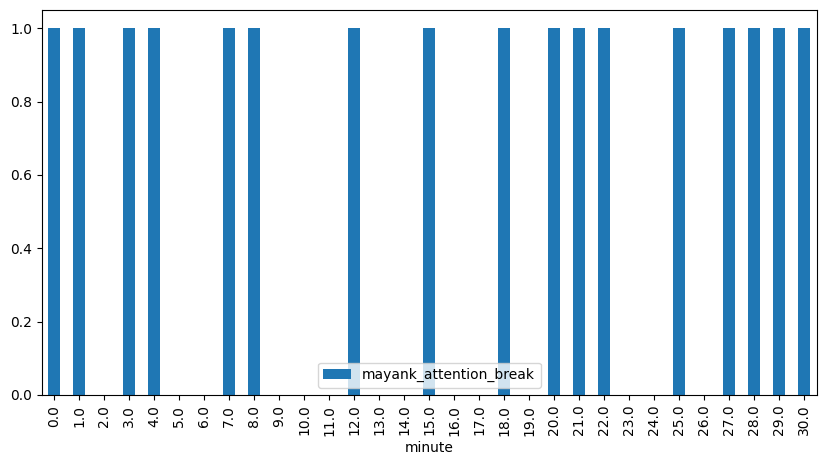

In [309]:
test.plot(y="jan_attention_break", figsize=(10,5), kind="bar")
test.plot(y="luuk_attention_break", figsize=(10,5),  kind="bar")
test.plot(y="carlos_attention_break", figsize=(10,5),  kind="bar")
test.plot(y="mayank_attention_break", figsize=(10,5), kind="bar")

In [305]:
test["rolling"] = test["sum"].rolling(4, min_periods=1).mean()

In [306]:
test["rolling2"] = test["rolling"].rolling(4, min_periods=1).mean()

<AxesSubplot: xlabel='minute'>

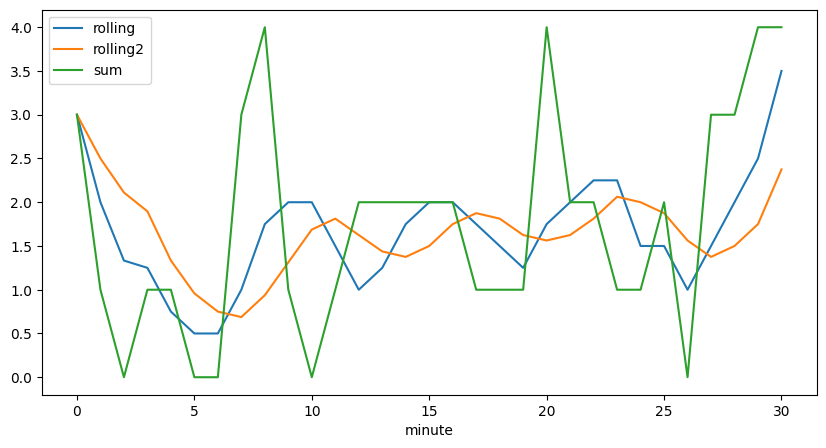

In [307]:
test.plot(y=["rolling","rolling2", "sum"], figsize=(10,5))